 <center>
    <h1><b>ICT MAIN PROJECT</b></h1>
    <h3><b>DSA Batch 2 - GROUP 5</b></h3>
    <pre>DOMAIN : ENTERTAINMENT
    PROJECT : MOVIE GENRE PREDICTION / RECOMMENDATION SYSTEM</pre>
    <h4><b>WEEK 1 - EDA </b></h4>
</center>

<h4><b>STEP 1 : Importing all necessary libraries in to notebook

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pd. set_option('display.max_columns', None,'display.max_rows',None,'display.max_colwidth', None)

<h2><b> TASK 1 : UNDERSTANDING DATA

<h4> Reading the dataset to the python environment

In [ ]:
data = pd.read_csv('all_df.csv',low_memory=False)

<h4><b>A : Displaying first few rows

In [ ]:
data.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
0,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helsengreen, Emil Albes, Hugo Flink, Mary Hagen","Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg's offer to follow her home, ...",5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,32,den sorte drøm
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, Miss Robson, Helene Costello, Charles Sindelar, Mr. Howard, James R. Waite, Mr. Osborne, Harry Knowles, Mr. Paul, Mr. Brady, Mr. Corker",The fabled queen of Egypt's affair with Roman general Marc Antony is ultimately disastrous for both of them.,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,18,cleopatra
2,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de Liguoro, Pier Delle Vigne, Augusto Milla, Attilio Motta, Emilise Beretta",Loosely adapted from Dante's Divine Comedy and inspired by the illustrations of Gustav Doré the original silent film has been restored and has a new score by Tangerine Dream.,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,29,l'inferno
3,tt0002199,"From the Manger to the Cross; or, Jesus of Nazareth","From the Manger to the Cross; or, Jesus of Nazareth",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier, Alice Hollister, Samuel Morgan, James D. Ainsley, Robert G. Vignola, George Kellog, J.P. McGowan","An account of the life of Jesus Christ, based on the books of the New Testament: After Jesus' birth is foretold to his parents, he is born in Bethlehem, and is visited by shepherds and wise...",5.7,484,NaN,NaN,NaN,NaN,13.0,5.0,36,"from the manger to the cross; or, jesus of nazareth"
4,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",Projektions-AG Union (PAGU),"Pola Negri, Emil Jannings, Harry Liedtke, Eduard von Winterstein, Reinhold Schünzel, Else Berna, Fred Immler, Gustav Czimeg, Karl Platen, Bernhard Goetzke, Magnus Stifter, Paul Biensfeldt, Willy Kaiser-Heyl, Alexander Ekert, Robert Sortsch-Pla","The story of Madame DuBarry, the mistress of Louis XV of France, and her loves in the time of the French revolution.",6.8,753,NaN,NaN,NaN,NaN,12.0,9.0,22,madame dubarry


 <h4><b>B : Checking dataset shape

In [ ]:
data.shape

(74889, 24)

<h5> There are 74,889 instances and 24 attributes for the dataset.

<H4><B> C : Checking column names

In [ ]:
data.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'description_#words',
       'movie_title'],
      dtype='object')

<b><h4>D : Checking dataset info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74889 entries, 0 to 74888
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          74889 non-null  object 
 1   title                  74889 non-null  object 
 2   original_title         74889 non-null  object 
 3   year                   74889 non-null  object 
 4   date_published         74889 non-null  object 
 5   genre                  74889 non-null  object 
 6   duration               74889 non-null  int64  
 7   country                74830 non-null  object 
 8   language               74171 non-null  object 
 9   director               74823 non-null  object 
 10  writer                 73584 non-null  object 
 11  production_company     71145 non-null  object 
 12  actors                 74837 non-null  object 
 13  description            74889 non-null  object 
 14  avg_vote               74889 non-null  float64
 15  vo

<h4><b> E : Checking for descriptive statistics

In [ ]:
#1
data.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,description_#words
count,74889.000000,74889.000000,7.488900e+04,11678.000000,68842.000000,65181.000000,74889.000000
mean,100.352522,5.900541,9.730489e+03,55.712023,46.574853,27.658566,29.717956
std,22.357984,1.229920,5.473764e+04,17.763344,180.482569,58.829668,7.226405
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,16.000000
25%,88.000000,5.200000,2.100000e+02,43.000000,4.000000,3.000000,24.000000
50%,96.000000,6.100000,5.000000e+02,56.000000,9.000000,8.000000,31.000000
75%,108.000000,6.800000,1.789000e+03,69.000000,27.000000,24.000000,35.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000,79.000000


In [ ]:
#2
data.describe(include=object)

,imdb_title_id,title,original_title,year,date_published,genre,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income,movie_title
count,74889,74889,74889,74889,74889,74889,74830,74171,74823,73584,71145,74837,74889,20811,13558,26918,74889
unique,74889,71907,70906,111,20790,1213,4483,3994,31925,59381,29309,74806,74821,4217,13171,26446,70868
top,tt2327118,Anna,Anna,2017,2010,Drama,USA,English,Michael Curtiz,Jing Wong,Metro-Goldwyn-Mayer (MGM),Sergey A.,"Desperate measures are taken by a man who tries to save his family from the dark side of the law, after they commit an unexpected crime.",$ 1000000,$ 1000000,$ 8144,wanted
freq,1,8,8,2968,104,10850,25235,31900,77,73,1146,4,4,668,17,15,8


<h4><b> F : Checking for null values

In [ ]:
data.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     59
language                   718
director                    66
writer                    1305
production_company        3744
actors                      52
description                  0
avg_vote                     0
votes                        0
budget                   54078
usa_gross_income         61331
worlwide_gross_income    47971
metascore                63211
reviews_from_users        6047
reviews_from_critics      9708
description_#words           0
movie_title                  0
dtype: int64

<h2><b> TASK 2 : EXPLORATORY DATA ANALYSIS

In [ ]:
#Importing warning packages to ignore future warnings
import warnings
warnings.filterwarnings('ignore')

<h3><b> A : UNIVARIATE ANALYSIS

<h4><b> &#8544; : Distribution of number of movies released over the years

In [ ]:
data.year.value_counts()

2017             2968
2018             2913
2016             2785
2015             2655
2014             2627
2019             2541
2013             2459
2012             2268
2011             2125
2009             1988
2010             1952
2008             1835
2006             1773
2007             1771
2005             1571
2004             1442
2003             1284
2001             1220
2002             1174
1999             1153
2000             1115
1998             1017
1997              954
1995              859
1996              855
1994              769
1988              765
1989              760
1987              755
1993              754
2020              715
1991              708
1992              692
1986              689
1990              676
1985              614
1973              586
1971              579
1984              575
1972              575
1983              572
1982              561
1970              555
1977              546
1981              542
1974      

In [ ]:
#Locating 'TV Movie 2019'
data.loc[data['year']=='TV Movie 2019']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
73144,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,"Mike Makowsky, Robert Kolker",HBO Films,"Hugh Jackman, Ray Romano, Welker White, Allison Janney, Annaleigh Ashford, Stephanie Kurtzuba, Calvin Coakley, Geraldine Viswanathan, Sung Yun Cho, Justin Swain, Laura Patinkin, Kathrine Narducci, Brent Langdon, Tia DeShazor, Victor Verhaeghe","The beloved superintendent of New York's Roslyn school district and his staff, friends and relatives become the prime suspects in the unfolding of the single largest public school embezzlement scandal in American history.",7.1,23973,NaN,NaN,NaN,79.0,135.0,98.0,33,bad education


In [ ]:
#basic text cleaning
data['year'][73144]=data['year'][73144].replace('TV Movie ','')
#changing datatype 'string' to numerical value
data['year']=pd.to_numeric(data['year'])

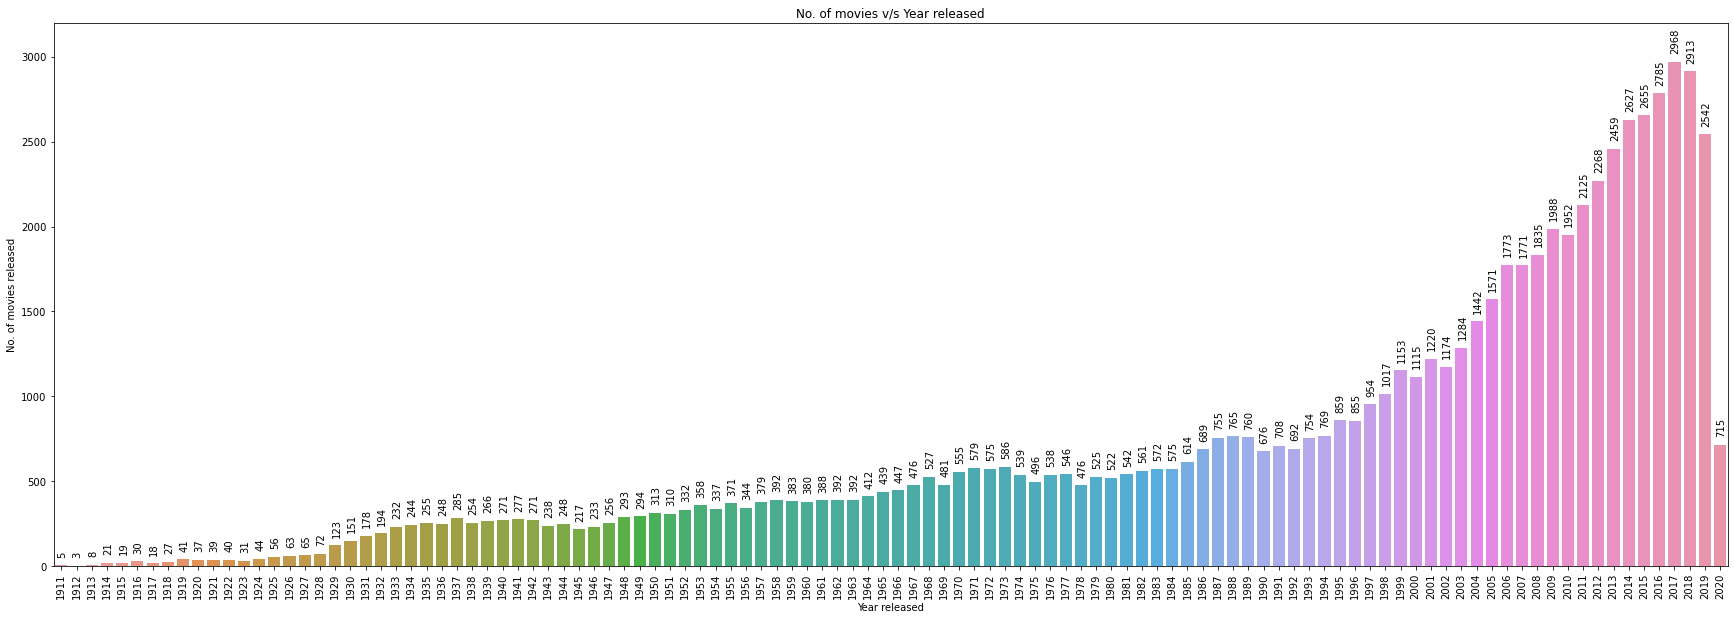

In [ ]:
#plotting movie distribution by year
plt.figure(figsize=(30,10))
fig=sns.countplot(data['year'])
plt.title("No. of movies v/s Year released")
plt.xticks(rotation=90)
plt.xlabel("Year released")
plt.ylabel("No. of movies released")
plt.ylim(0,3200)
#to get the count displayed on the chart
for p in fig.patches:
    fig.annotate(round(p.get_height()) , (p.get_x()+0.15, p.get_height()+60),rotation=90)

INSIGHTS : 
1. The number of movies released per year is increasing year by year.
2. There is a decline in the number of movies released in 2020, which might be due to the pandemic. 

<h4><b>&#8545; : Distribution of movies by genre

In [ ]:
#1 - Genre/Genre combination(s) directly from dataset
data.genre.value_counts()

Drama                              10850
Comedy                              6365
Comedy, Drama                       3445
Drama, Romance                      3001
Comedy, Romance                     2202
Horror                              2054
Comedy, Drama, Romance              2002
Drama, Thriller                     1231
Crime, Drama                        1186
Action, Crime, Drama                1173
Horror, Thriller                    1106
Thriller                            1104
Crime, Drama, Thriller               896
Action, Drama                        777
Drama, War                           672
Action                               639
Crime, Drama, Mystery                592
Action, Adventure, Drama             547
Western                              541
Action, Adventure, Comedy            537
Horror, Mystery, Thriller            524
Comedy, Horror                       524
Action, Thriller                     505
Comedy, Crime                        497
Comedy, Crime, D

INSIGHTS : 
1. Huge number of movies are released in drama Genre
2. Total of 1213 unique combination of genre of movies present in dataset

In [ ]:
#Cleaning Genre Column and finding distribution of unique genre

#Defining Cleaning function - Removes Spaces between strings
def clean_list(list):
    l=[]
    for i in list:
        l.append(i.replace(' ',''))
    return l

#Splitting and Relisting Genre Elements
genre1 = data['genre'].str.split(',')
li=[]
for i in genre1:
    li.append(clean_list(i))


#creating a list of all genres
genre_list=[]
for x in li:
    for y in x:
        if y not in genre_list:
            genre_list.append(y)
            
#genre_list=list(set(genre_list))
genre_list 

['Drama',
 'History',
 'Adventure',
 'Fantasy',
 'Biography',
 'Romance',
 'Crime',
 'War',
 'Mystery',
 'Horror',
 'Western',
 'Comedy',
 'Family',
 'Action',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Animation',
 'Musical',
 'Music',
 'Film-Noir',
 'Adult',
 'Reality-TV',
 'News',
 'Documentary']

In [ ]:
#Counting Movies in respective genres
d_genre={}
for x in genre_list:
    d_genre[x]=0
for x in genre_list:
    for i in li:
        if x in i:
            d_genre[x]+=1
d_genre=dict(sorted(d_genre.items(), key=lambda item: item[1],reverse=True))

In [ ]:
# function to add value labels
def addlabels(x):
    for key,value in x.items():
        plt.text(key,x[key]+500,x[key])

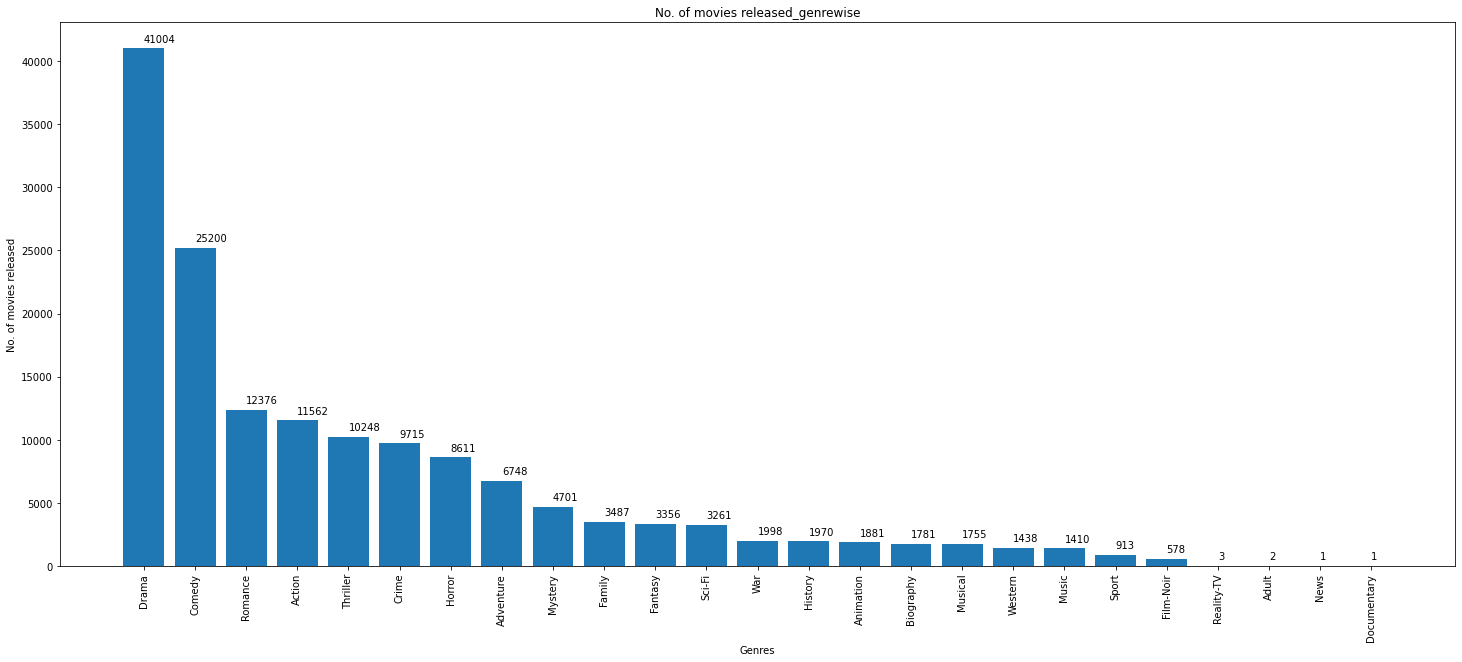

In [ ]:
#Plotting Distribution of Movies by genre
plt.figure(figsize=(25,10))
plt.bar(d_genre.keys(),d_genre.values())
addlabels(d_genre)
plt.title("No. of movies released_genrewise")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("No. of movies released")
plt.show()

INSIGHT :
1. Drama genre has the highest number of movies, followed by 'Comedy' and 'Romance'.
2. There are very few movies in the 'News', 'Documentary', 'Adult' genres.

<h4><b> &#8546; : Top 10 Movies based on Number of Votes Received

In [ ]:
#Checking Top 10 movies by votes in dataframe
data.nlargest(10,['votes'])

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
24993,tt0111161,Le ali della libertà,The Shawshank Redemption,1994,1995-02-10,Drama,142,USA,English,Frank Darabont,"Stephen King, Frank Darabont",Castle Rock Entertainment,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler, Clancy Brown, Gil Bellows, Mark Rolston, James Whitmore, Jeffrey DeMunn, Larry Brandenburg, Neil Giuntoli, Brian Libby, David Proval, Joseph Ragno, Jude Ciccolella","Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",9.3,2278845,$ 25000000,$ 28699976,$ 28815245,80.0,8232.0,164.0,19,the shawshank redemption
41727,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Warner Bros.,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine, Maggie Gyllenhaal, Gary Oldman, Morgan Freeman, Monique Gabriela Curnen, Ron Dean, Cillian Murphy, Chin Han, Nestor Carbonell, Eric Roberts, Ritchie Coster, Anthony Michael Hall","When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",9.0,2241615,$ 185000000,$ 535234033,$ 1005455211,84.0,6938.0,423.0,33,the dark knight
49793,tt1375666,Inception,Inception,2010,2010-09-24,"Action, Adventure, Sci-Fi",148,"USA, UK","English, Japanese, French",Christopher Nolan,Christopher Nolan,Warner Bros.,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Tom Hardy, Ken Watanabe, Dileep Rao, Cillian Murphy, Tom Berenger, Marion Cotillard, Pete Postlethwaite, Michael Caine, Lukas Haas, Tai-Li Lee, Claire Geare, Magnus Nolan",A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.,8.8,2002816,$ 160000000,$ 292576195,$ 869784991,74.0,3927.0,473.0,27,inception
28549,tt0137523,Fight Club,Fight Club,1999,1999-10-29,Drama,139,"USA, Germany",English,David Fincher,"Chuck Palahniuk, Jim Uhls",Fox 2000 Pictures,"Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier, Richmond Arquette, David Andrews, George Maguire, Eugenie Bondurant, Helena Bonham Carter, Christina Cabot, Sydney 'Big Dawg' Colston, Rachel Singer, Christie Cronenweth, Tim DeZarn, Ezra Buzzington","An insomniac office worker and a devil-may-care soapmaker form an underground fight club that evolves into something much, much more.",8.8,1807440,$ 63000000,$ 37030102,$ 101218804,66.0,3758.0,370.0,20,fight club
24927,tt0110912,Pulp Fiction,Pulp Fiction,1994,1994-10-28,"Crime, Drama",154,USA,"English, Spanish, French",Quentin Tarantino,"Quentin Tarantino, Roger Avary",Miramax,"Tim Roth, Amanda Plummer, Laura Lovelace, John Travolta, Samuel L. Jackson, Phil LaMarr, Frank Whaley, Burr Steers, Bruce Willis, Ving Rhames, Paul Calderon, Bronagh Gallagher, Rosanna Arquette, Eric Stoltz, Uma Thurman","The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.",8.9,1780147,$ 8000000,$ 107928762,$ 222831817,94.0,3058.0,289.0,27,pulp fiction
24643,tt0109830,Forrest Gump,Forrest Gump,1994,1994-10-06,"Drama, Romance",142,USA,English,Robert Zemeckis,"Winston Groom, Eric Roth",Paramount Pictures,"Tom Hanks, Rebecca Williams, Sally Field, Michael Conner Humphreys, Harold G. Herthum, George Kelly, Bob Penny, John Randall, Sam Anderson, Margo Moorer, Ione M. Telech, Christine Seabrook, John Worsham, Peter Dobson, Siobhan Fallon Hogan","The presidencies of Kennedy and Johnson, the events of Vietnam, Watergate and other historical events unfold through the perspective of an Alabama 

In [ ]:
#Creating List of Top10 Movies
TOP10_VOTES = data.votes.nlargest(10)
TOP10_IN = TOP10_VOTES.index

lis = []
for i in TOP10_IN:
    K = data.loc[data.index==i].original_title        #Saving original Title/movie name to a variable K
    K = K.to_string()                                 #Converting 'Series' data type to 'String'
    K = K[9:]                                         #Removing first 9 placeholders from K
    lis.append(K)
lis

['The Shawshank Redemption',
 'The Dark Knight',
 'Inception',
 'Fight Club',
 'Pulp Fiction',
 'Forrest Gump',
 'The Matrix',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Lord of the Rings: The Return of the King',
 'The Godfather']

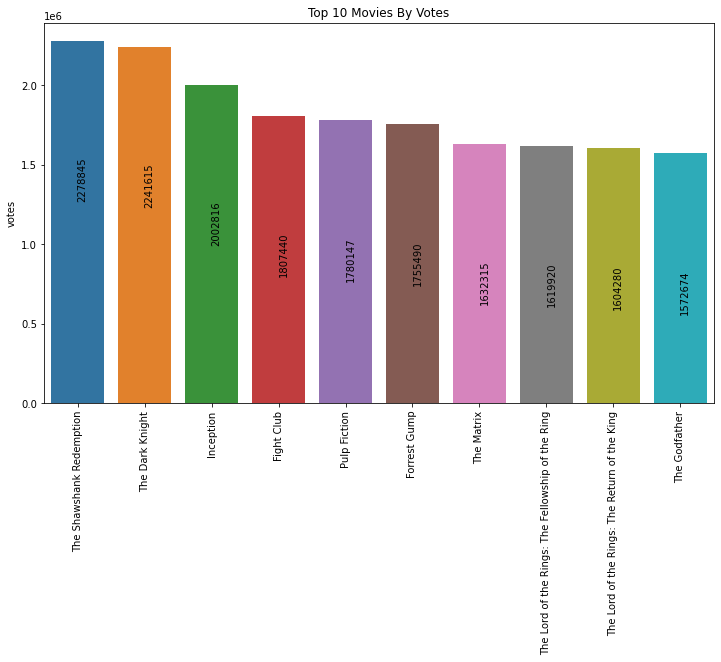

In [ ]:
#Plotting Top 10 movies by votes
fig,axs = plt.subplots(figsize=(12,7))
BarP = sns.barplot(x=lis,y=TOP10_VOTES)
BarP.set_title("Top 10 Movies By Votes")
plt.xticks(rotation = 90)
for p in BarP.patches:
    BarP.annotate(round(p.get_height()) , (p.get_x()+0.4,p.get_height()-1e6),rotation=90)
plt.show()

INSIGHT : 
1. 'The Shawshank Redemption' received the most number of votes followed by 'The Dark Knight' and 'Inception'.

#### &#8547; : Top 10 movies based on profit

In [ ]:
#remove $ sign and converting columns to numerical type
for x in ['budget', 'usa_gross_income', 'worlwide_gross_income']:
    data[x]=pd.to_numeric(data[x].str.replace(r'\D', ''))

In [ ]:
#Calculating the profit of movies
data['profit']=data['worlwide_gross_income']-data['budget']
data['profit'] =data['profit'] .apply(lambda x: x if x > 0 else 0)

In [ ]:
TOP10_Profit = data.profit.nlargest(10)
TOP10_IND = TOP10_Profit.index

lis1 = []
for i in TOP10_IND:
    K = data.loc[data.index==i].original_title        #Saving original Title/movie name to a variable K
    K = K.to_string()                                 #Converting 'Series' data type to 'String'
    K = K[9:]                                         #Removing first 9 placeholders from K
    lis1.append(K)
lis1

['Avatar',
 'Titanic',
 'Star Wars: Episode VII - The Force Awakens',
 'Avengers: Infinity War',
 'Jurassic World',
 'The Lion King',
 'Frozen II',
 'The Avengers',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Jurassic World: Fallen Kingdom']

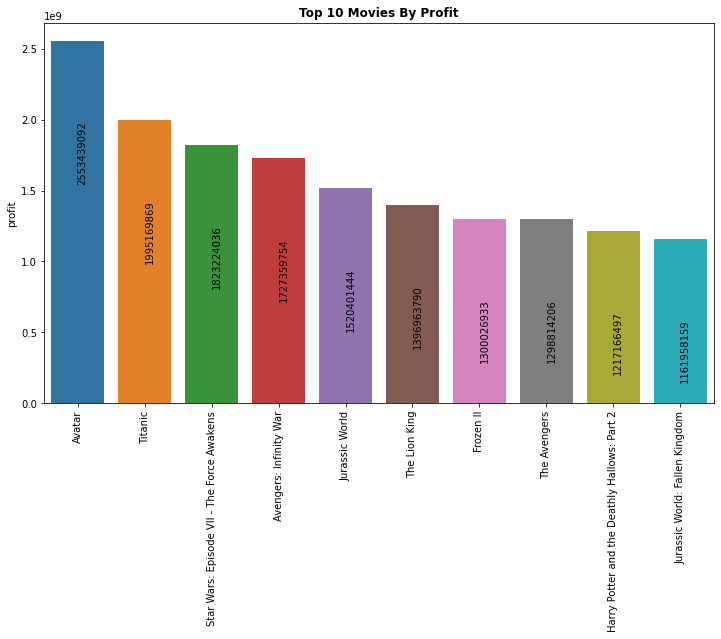

In [ ]:
#Plotting Top 10 movies by votes
fig,axs = plt.subplots(figsize=(12,7))
BarP = sns.barplot(x=lis1,y=TOP10_Profit)
BarP.set_title("Top 10 Movies By Profit",weight = 'bold')
plt.xticks(rotation = 90)
for p in BarP.patches:
    BarP.annotate(round(p.get_height()) , (p.get_x()+0.4,p.get_height()-1e9),rotation=90)
plt.show()

INSIGHT :
1. All the top ten movies have made profit over a billion dollars.
2. None of the top ten movies have made it to the top ten profitable movie  list. 

#### &#8548; : Top 10 directors by number of movie directed

In [ ]:
data.director.value_counts().nlargest(10)

Michael Curtiz        77
Jesús Franco          76
Lesley Selander       70
Lloyd Bacon           67
Richard Thorpe        62
William Beaudine      59
John Ford             57
Giannis Dalianidis    56
Raoul Walsh           54
Cheh Chang            53
Name: director, dtype: int64

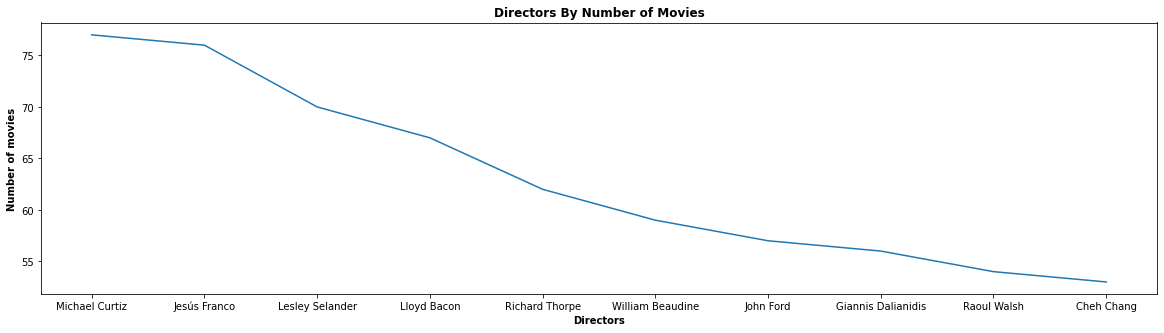

In [ ]:
fig,axs=plt.subplots(figsize=(20,5))
LineP=sns.lineplot(x=data['director'].value_counts()[:10].index,y=data['director'].value_counts()[:10])
LineP.set_title("Directors By Number of Movies", weight = "bold")
LineP.set_xlabel("Directors", weight = "bold")
LineP.set_ylabel("Number of movies", weight = "bold")
plt.show()

INSIGHT :    
1. Michael Curtiz directed 77 movies while J.Franco is in 2nd position only behind by 1 movie.


#### &#8549; : Boxplot of some numerical datatypes

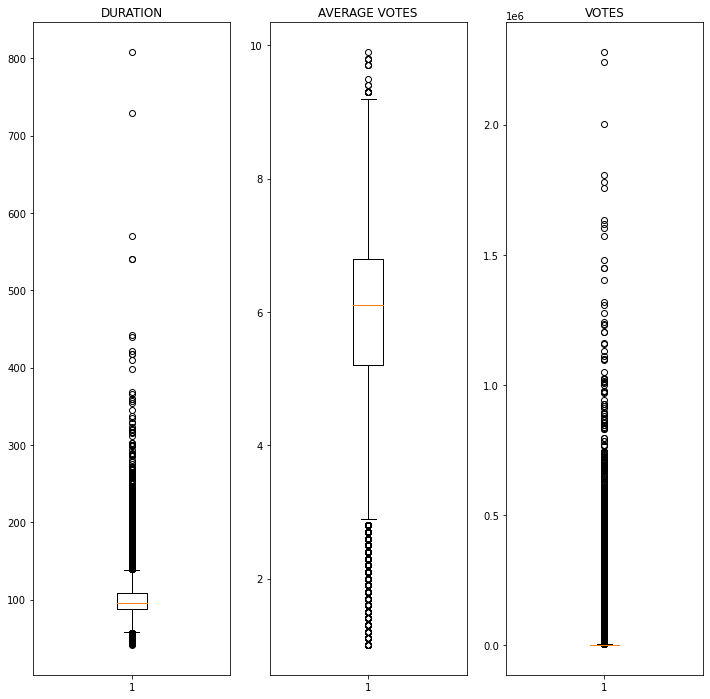

In [ ]:
plt.figure(figsize = (12,12))

plt.subplot(1,3,1)
plt.boxplot(data['duration'])
plt.gca().set_title('DURATION')

plt.subplot(1,3,2)
plt.boxplot(data['avg_vote'])
plt.gca().set_title('AVERAGE VOTES')

plt.subplot(1,3,3)
plt.boxplot(data['votes'])
plt.gca().set_title('VOTES')

plt.show()

INSIGHT : 
1. There are outliers in all the three attributes.
2. The attributes 'duration' and 'votes' are less distributed.

<h4><b> &#8550; : Top 10 countries based on number of movies released

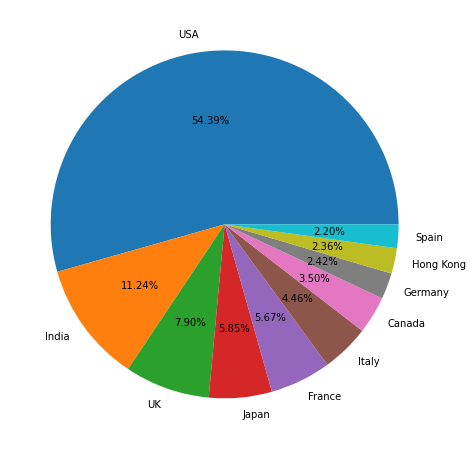

In [ ]:
Coun_T10 = data.country.value_counts().nlargest(10)
plt.figure(figsize = (8,8))
plt.pie(Coun_T10,labels=Coun_T10.index,autopct= '%1.2f%%')
plt.show()

INSIGHT : 
1. USA releases the most number of movies followed by India and UK.
2. USA produces more movies than the other nine countries in the list combined.

<h4><b> &#8551; : Top 10 languages based on number of movies released

In [ ]:
Country_T10 = data.language.value_counts().nlargest(10)

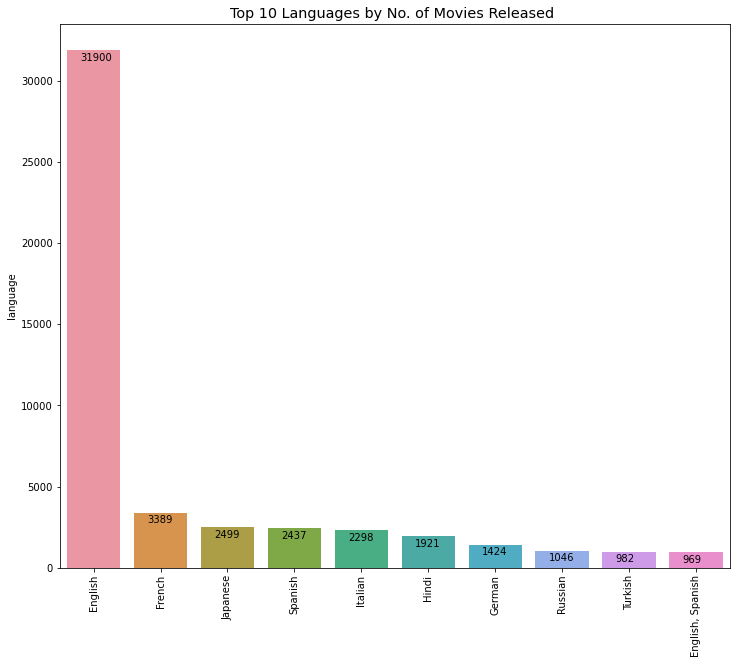

In [ ]:
fig,axs=plt.subplots(figsize=(12,10))
plt.style.use('ggplot')
g=sns.barplot(x = Country_T10.index, y = Country_T10)
g.set_title("Top 10 Languages by No. of Movies Released ")
plt.xticks(rotation = 90)
for p in g.patches:
    g.annotate(round(p.get_height()) , (p.get_x()+0.2,p.get_height()-650))
plt.show()

INSIGHT :
1. The highest number of movies are produced in the English language followed by French and Japanese languages.
2. Also, movies released in English are almost ten times the number of movies released in French.

<H3><B> B : BIVARIATE ANALYSIS

<h4><b>&#8544; : Worldwide gross income v/s Metascore

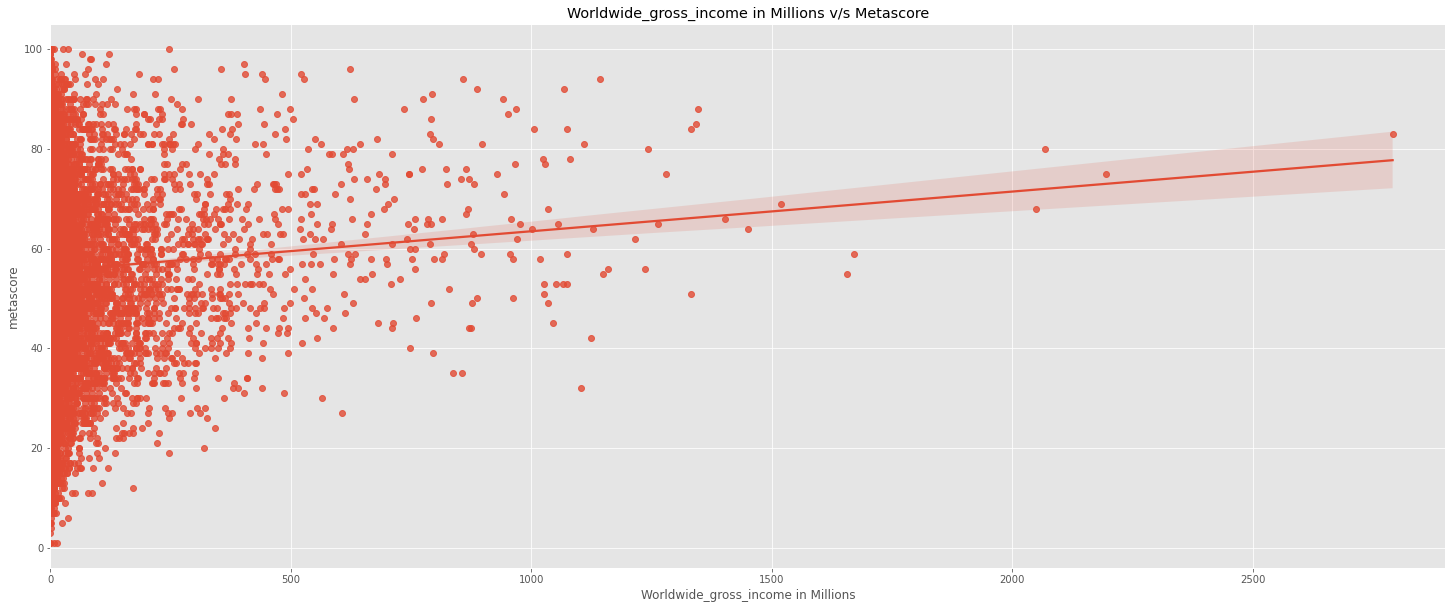

In [ ]:
plt.figure(figsize=(25,10))
sns.regplot((data['worlwide_gross_income']/1000000),data['metascore'])
plt.title("Worldwide_gross_income in Millions v/s Metascore")
plt.xlabel("Worldwide_gross_income in Millions")
plt.xlim(0,2900)
plt.show()

INSIGHTS : 
1. There is a slight positive correlation between worldwide gross income and metascore of a movie.
2. However, some movies which have been highly rated by critics perform very badly in the box office.

#### &#8545; : Average budget spend on movies - genrewise

In [ ]:
#creating a subset of data without missing values of 'budget'
data_budget=data.dropna(subset=['budget'])
data_budget=data_budget.reset_index()

In [ ]:
#creating a dictionary with keys as genres and values as budget spend
d_budget={}

for x in genre_list:
    d_budget[x]=0
for x in genre_list:
    i=0
    for k in data_budget['genre']:
        if x in k:
            d_budget[x]+=data_budget['budget'][i]
        i+=1

#calculating average budget in millions
for key in d_budget:
    d_budget[key]=(d_budget[key]/d_genre[key]/1000000)
    
d_budget=dict(sorted(d_budget.items(), key=lambda item: item[1],reverse=True))

# function to add value labels
def addlabels1(x):
    for key,value in x.items():
        plt.text(key,x[key]+1,round(x[key],3))

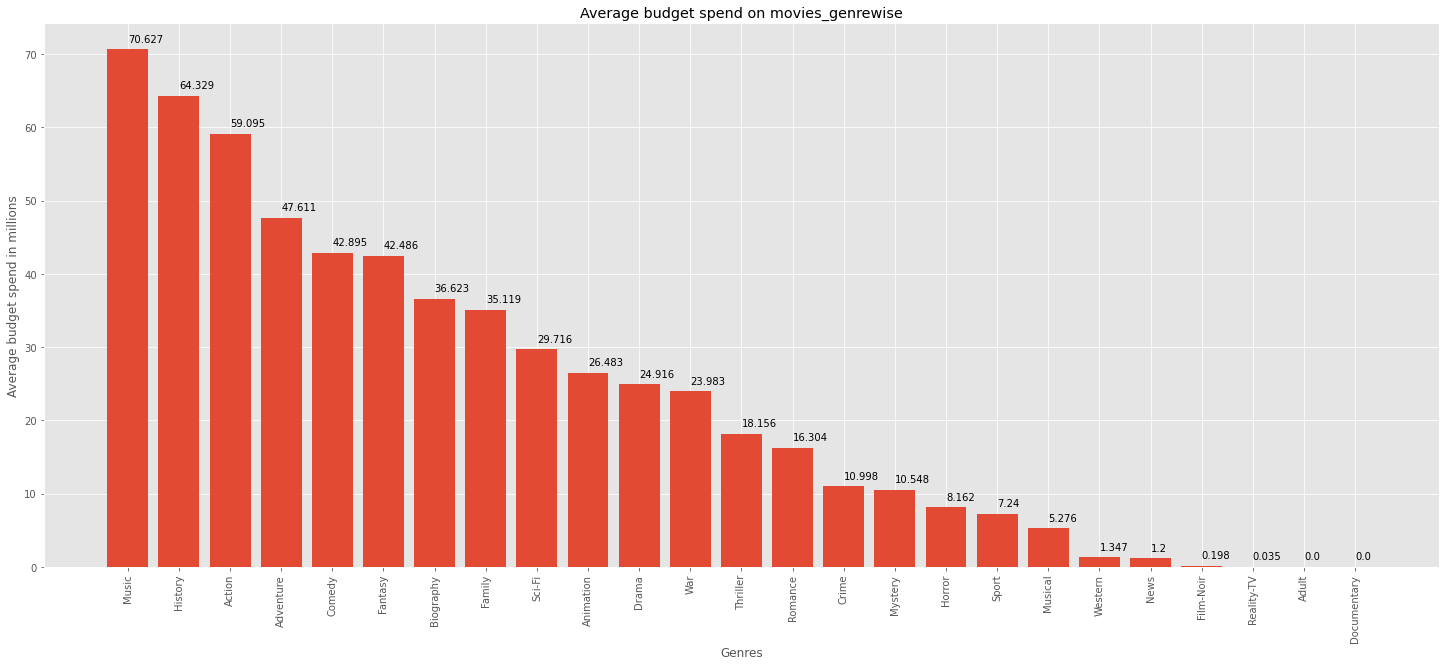

In [ ]:
plt.figure(figsize=(25,10))
plt.bar(d_budget.keys(),d_budget.values())
addlabels1(d_budget)
plt.title("Average budget spend on movies_genrewise")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Average budget spend in millions")
plt.show()

INSIGHT :
1. The highest budget is spend on 'History', 'Music' and 'Action' genres.

#### &#8546; : Average profit of movies_genrewise

In [ ]:
#creating a subset of data without missing values of 'profit'
data_profit=data.dropna(subset=['worlwide_gross_income','budget'])
data_profit=data_profit.reset_index()

#creating a dictionary with keys as genres and values as average profit
d_profit={}

for x in genre_list:
    d_profit[x]=0
for x in genre_list:
    i=0
    for k in data_profit['genre']:
        if x in k:
            d_profit[x]+=data_profit['profit'][i]
        i+=1

#calculating average profit in millions
for key in d_profit:
    d_profit[key]=(d_profit[key]/d_genre[key]/1000000)
    
d_profit=dict(sorted(d_profit.items(), key=lambda item: item[1],reverse=True))

# function to add value labels
def addlabels2(x):
    for key,value in x.items():
        plt.text(key,x[key]+0.5,round(x[key],3))

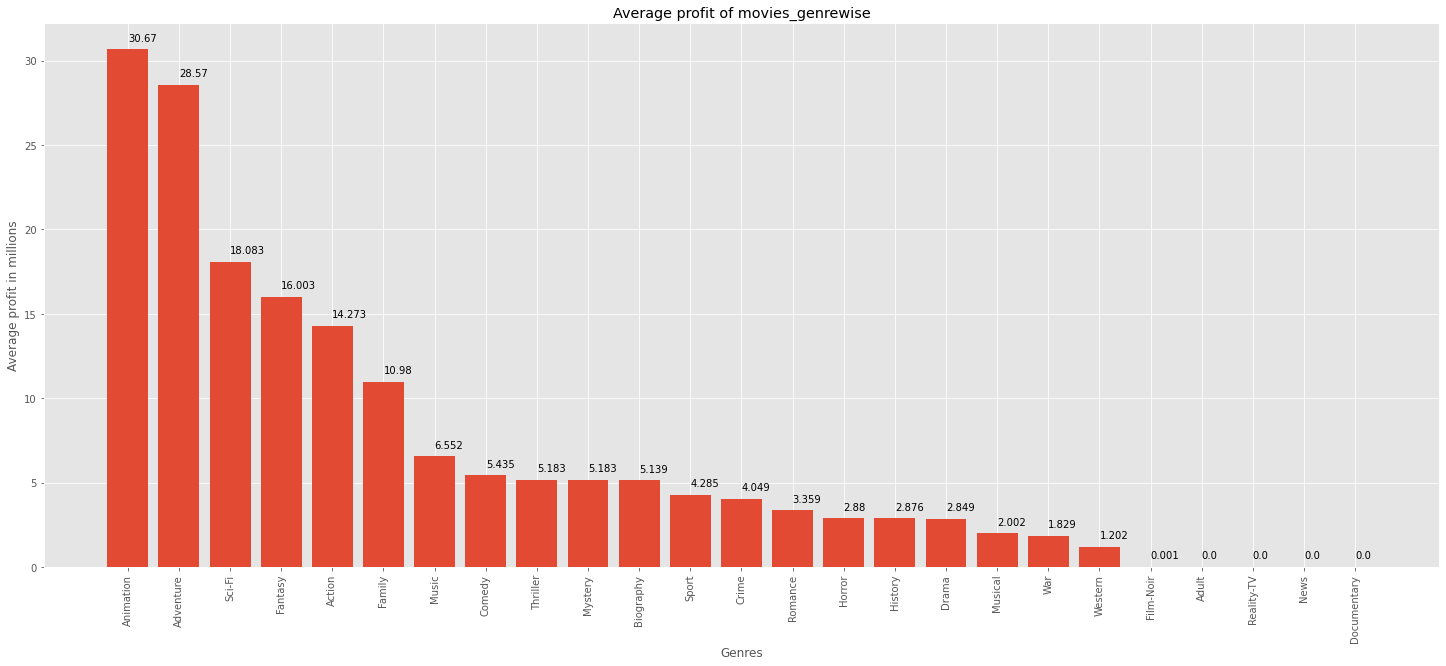

In [ ]:
plt.figure(figsize=(25,10))
plt.bar(d_profit.keys(),d_profit.values())
addlabels2(d_profit)
plt.title("Average profit of movies_genrewise")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Average profit in millions")
plt.show()

INSIGHT:
1. 'Animation' and 'Adventure' brings the highest profit.<br>2. Despite the high budget spend on 'History', 'Music' and 'Action' movies, they are relatively less profitable.

#### &#8547; : Top profit making movies for the last decade

In [ ]:
d_year=data_profit.groupby('year')
d_a=dict()

#creating a dictionary with keys as year and values as movie with the highest profit
for x in range(2011,2021):
    d_a[x]=''
for x in range(2011,2021):
    d_a[x]=data_profit['title'][d_year.get_group(x)['profit'].idxmax()]

#creating a dictionary with keys as year and values as profit
d_b={}
for x in range(2011,2021):
    d_b[x]=0
for x in range(2011,2021):
    d_b[x]=(data_profit.loc[data_profit['title']==d_a[x],'profit'].values[0])/1000000

# function to add value labels
def addlabels3(x):
    for key,value in x.items():
        plt.text(d_a[key],d_b[key]+40,round(d_b[key],3))

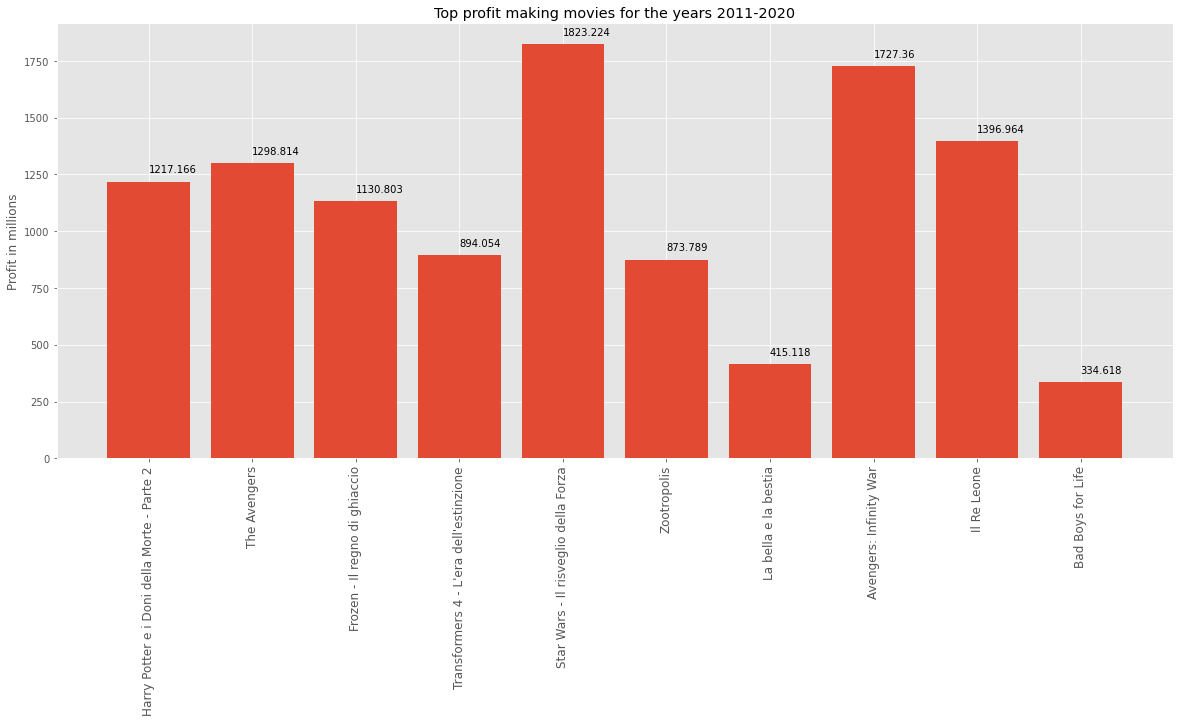

In [ ]:
plt.figure(figsize=(20,8))
plt.style.use('ggplot')
plt.bar(d_a.values(),d_b.values())
addlabels3(d_a)
plt.title("Top profit making movies for the years 2011-2020")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Profit in millions")
plt.show()

Insights : 
1. All the top movies of the last decade have made a profit over 300 million dollars. 
2. 'The Avengers', the top profitable movie of 2012 has made it to the top ten profitable movie list of all times too. 

#### &#8548; : Top rated movies for the last decade

In [ ]:
d_year1=data.groupby('year')
d_c=dict()

#creating a dictionary with keys as year and values as highest rated movie
for x in range(2011,2021):
    d_c[x]=''
for x in range(2011,2021):
    d_c[x]=data['original_title'][d_year1.get_group(x)['votes'].idxmax()]

#creating a dictionary with keys as year and values as votes
d_d={}
for x in range(2011,2021):
    d_d[x]=0
for x in range(2011,2021):
    d_d[x]=(data.loc[data['original_title']==d_c[x],'votes'].values[0])
    
# function to add value labels
def addlabels4(x):
    for key,value in x.items():
        plt.text(d_c[key],d_d[key]+10000,d_d[key])

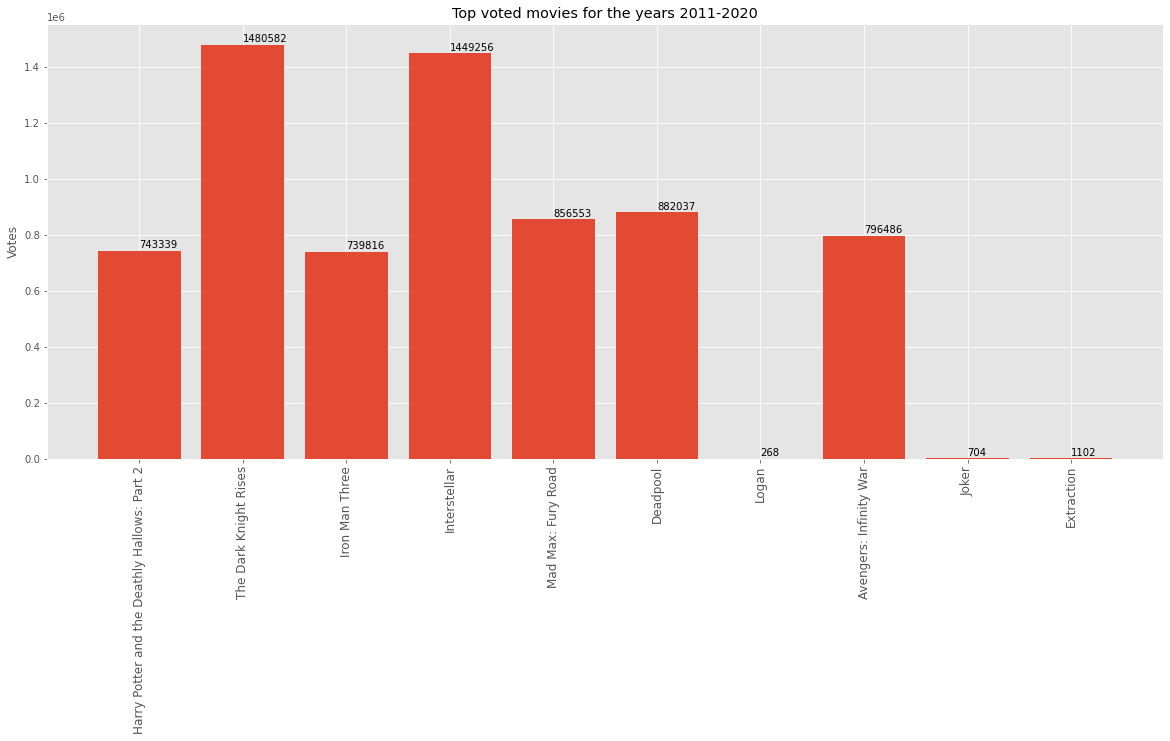

In [ ]:
plt.figure(figsize=(20,8))
plt.style.use('ggplot')
plt.bar(d_c.values(),d_d.values())
addlabels4(d_c)
plt.title("Top voted movies for the years 2011-2020")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Votes")
plt.show()

INSIGHTS:
1. None of the top voted movies of the last decade has made it to the top voted movies of all times. 

#### &#8549; : Heatmap of dataset with respect to correlation 

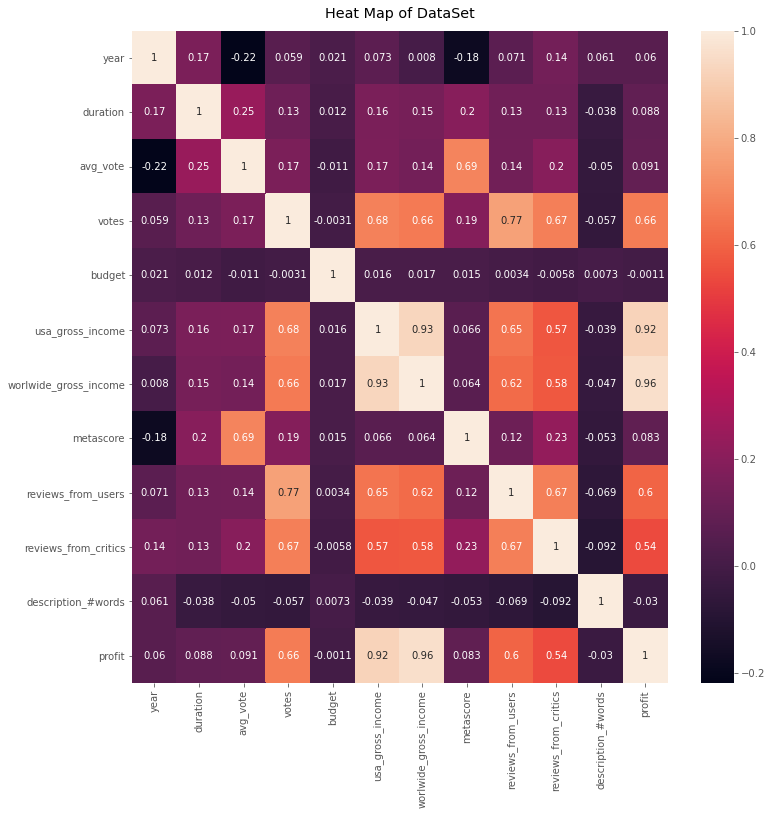

In [ ]:
plt.figure(figsize = (12,12))
HM=sns.heatmap(data.corr(),annot=True)
HM.set_title("Heat Map of DataSet",y = 1.01)
plt.show()

<pre>INSIGHTS : 
A. Attributes having high positive correlation
    1. 'worlwide_gross_income' and 'profit'
    2. 'usa_gross_income' and 'profit'
    3. 'usa_gross_income' and 'worlwide_gross_income'

# <h2><b> TASK 3 : DATA PREPROCESSING

# <h3><b> A : DELETING DUPLICATE ROWS

In [ ]:
#dropping duplicate rows
data.drop_duplicates
data.shape

(74889, 25)

There are no duplicate rows.

# <h3><b> B : HANDLING MISSING VALUES

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74889 entries, 0 to 74888
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          74889 non-null  object 
 1   title                  74889 non-null  object 
 2   original_title         74889 non-null  object 
 3   year                   74889 non-null  int64  
 4   date_published         74889 non-null  object 
 5   genre                  74889 non-null  object 
 6   duration               74889 non-null  int64  
 7   country                74830 non-null  object 
 8   language               74171 non-null  object 
 9   director               74823 non-null  object 
 10  writer                 73584 non-null  object 
 11  production_company     71145 non-null  object 
 12  actors                 74837 non-null  object 
 13  description            74889 non-null  object 
 14  avg_vote               74889 non-null  float64
 15  vo

In [ ]:
#filling the missing values with an empty string
for x in ['country','language','director','writer','actors']:
    data[x]=data[x].fillna('')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74889 entries, 0 to 74888
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          74889 non-null  object 
 1   title                  74889 non-null  object 
 2   original_title         74889 non-null  object 
 3   year                   74889 non-null  int64  
 4   date_published         74889 non-null  object 
 5   genre                  74889 non-null  object 
 6   duration               74889 non-null  int64  
 7   country                74889 non-null  object 
 8   language               74889 non-null  object 
 9   director               74889 non-null  object 
 10  writer                 74889 non-null  object 
 11  production_company     71145 non-null  object 
 12  actors                 74889 non-null  object 
 13  description            74889 non-null  object 
 14  avg_vote               74889 non-null  float64
 15  vo

# <h3><b> C : CLEANING THE FEATURE 'GENRE'

In [ ]:
data['genre'].head()

0                        Drama
1               Drama, History
2    Adventure, Drama, Fantasy
3             Biography, Drama
4    Biography, Drama, Romance
Name: genre, dtype: object

In [ ]:
#Creating a list in the 'genre' feature
data['genre'] = data['genre'].str.split(',')
li=[]
for i in data['genre']:
    li.append(clean_list(i))
data['genre']=li
data['genre'].head()

0                        [Drama]
1               [Drama, History]
2    [Adventure, Drama, Fantasy]
3             [Biography, Drama]
4    [Biography, Drama, Romance]
Name: genre, dtype: object

# <h3><b> D : REMOVAL OF STOPWORDS

Stopwords are words that you do not want to use to describe the topic of your content.They have to be removed for better performance of the model.

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
list(stop_words)

['a',
 'be',
 'other',
 'most',
 'doing',
 'because',
 'and',
 'ain',
 'o',
 'such',
 'am',
 'from',
 "you'll",
 "aren't",
 'will',
 'as',
 'don',
 'so',
 "wasn't",
 'was',
 'ours',
 'only',
 'hasn',
 'how',
 'we',
 'mightn',
 "mightn't",
 'own',
 'there',
 'up',
 'all',
 'aren',
 'do',
 'isn',
 'before',
 'few',
 'did',
 'below',
 'both',
 'each',
 "should've",
 'ourselves',
 'it',
 "isn't",
 'him',
 'herself',
 'theirs',
 'down',
 "couldn't",
 'won',
 'against',
 'during',
 'again',
 'some',
 "hasn't",
 'd',
 'needn',
 'should',
 'the',
 'just',
 "that'll",
 'over',
 'very',
 'those',
 'm',
 'with',
 'for',
 'while',
 "hadn't",
 'has',
 "needn't",
 "you're",
 'our',
 'had',
 'were',
 'y',
 'he',
 'on',
 'if',
 'after',
 'to',
 'being',
 "shouldn't",
 'haven',
 'wasn',
 'yours',
 'his',
 'why',
 'by',
 'any',
 "weren't",
 'what',
 'which',
 'himself',
 'doesn',
 'same',
 'is',
 'didn',
 'here',
 'too',
 'whom',
 'my',
 'until',
 'nor',
 'couldn',
 "won't",
 'she',
 'into',
 'through',

In [ ]:
# function for removing stopwords
def remove_stopwords(text):
    no_stopword_text = [x for x in text.split() if not x in stop_words]
    return ' '.join(no_stopword_text)

# functions for cleaning text
def clean_text(text):
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text)  
    # convert text to lowercase 
    text = text.lower() 
    return text

data['description_cleaned'] = data['description'].apply(lambda x: clean_text(x))
data['description_cleaned'] =data['description_cleaned'] .apply(lambda x: remove_stopwords(x))

# <h3><b> E : LEMMATIZATION

Lemmatization can be done to reduce the word to its root synonym.

In [ ]:
from nltk.stem import WordNetLemmatizer 

#initialising the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
#to break text into terms wenever it encounters a whitespace
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    word_list=[lemmatizer.lemmatize(x) for x in w_tokenizer.tokenize(text)]
    return ' '.join(word_list)

data['description_cleaned'] =data['description_cleaned'].apply(lemmatize_text)
data[['description','description_cleaned']].head()

,description,description_cleaned
0,"Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg's offer to follow her home, ...",two men high rank wooing beautiful famous equestrian acrobat stella stella ignores jeweler hirsch accepts count von waldberg offer follow home
1,The fabled queen of Egypt's affair with Roman general Marc Antony is ultimately disastrous for both of them.,fabled queen egypt affair roman general marc antony ultimately disastrous
2,Loosely adapted from Dante's Divine Comedy and inspired by the illustrations of Gustav Doré the original silent film has been restored and has a new score by Tangerine Dream.,loosely adapted dante divine comedy inspired illustration gustav dor original silent film restored new score tangerine dream
3,"An account of the life of Jesus Christ, based on the books of the New Testament: After Jesus' birth is foretold to his parents, he is born in Bethlehem, and is visited by shepherds and wise...",account life jesus christ based book new testament jesus birth foretold parent born bethlehem visited shepherd wise
4,"The story of Madame DuBarry, the mistress of Louis XV of France, and her loves in the time of the French revolution.",story madame dubarry mistress louis xv france love time french revolution


# <h3><b> F : FEATURE ENGINEERING

A new feature is created which contains all the key characteristics of a movie.

In [ ]:
#defining functions for basic text cleaning

def clean_list1(text):
    s=''
    for x in text:
        s=s+' '+x
        s=s.lower()
    return s 

def clean_text1(text):
    text=text.replace(' ','')
    text=text.replace('.','')
    text=text.replace(',',' ')
    text=text.lower()
    return text

In [ ]:
#performing some basic text cleaning
data['country_cleaned']=data['country'].apply(lambda x: clean_text(x))
data['language_cleaned']=data['language'].apply(lambda x: clean_text(x))
data['director_cleaned']=data['director'].apply(lambda x: clean_text1(x))
data['writer_cleaned']=data['writer'].apply(lambda x: clean_text1(x))
data['actors_cleaned']=data['actors'].apply(lambda x: clean_text1(x))
data['genre_cleaned']=data['genre'].apply(lambda x: clean_list1(x))

In [ ]:
data[['country','country_cleaned','language','language_cleaned','director','director_cleaned','writer','writer_cleaned','actors','actors_cleaned','genre','genre_cleaned']].head(2)

,country,country_cleaned,language,language_cleaned,director,director_cleaned,writer,writer_cleaned,actors,actors_cleaned,genre,genre_cleaned
0,"Germany, Denmark",germany denmark,,,Urban Gad,urbangad,"Urban Gad, Gebhard Schätzler-Perasini",urbangad gebhardschätzler-perasini,"Asta Nielsen, Valdemar Psilander, Gunnar Helsengreen, Emil Albes, Hugo Flink, Mary Hagen",astanielsen valdemarpsilander gunnarhelsengreen emilalbes hugoflink maryhagen,[Drama],drama
1,USA,usa,English,english,Charles L. Gaskill,charleslgaskill,Victorien Sardou,victoriensardou,"Helen Gardner, Pearl Sindelar, Miss Fielding, Miss Robson, Helene Costello, Charles Sindelar, Mr. Howard, James R. Waite, Mr. Osborne, Harry Knowles, Mr. Paul, Mr. Brady, Mr. Corker",helengardner pearlsindelar missfielding missrobson helenecostello charlessindelar mrhoward jamesrwaite mrosborne harryknowles mrpaul mrbrady mrcorker,"[Drama, History]",drama history


In [ ]:
data['key_words']=data['genre_cleaned']+' '+data['country_cleaned']+' '+data['language_cleaned']+' '+data['director_cleaned']+' '+data['writer_cleaned']+' '+data['actors_cleaned']+' '+data['description_cleaned']
data[['original_title','key_words']].head()

,original_title,key_words
0,Den sorte drøm,drama germany denmark urbangad urbangad gebhardschätzler-perasini astanielsen valdemarpsilander gunnarhelsengreen emilalbes hugoflink maryhagen two men high rank wooing beautiful famous equestrian acrobat stella stella ignores jeweler hirsch accepts count von waldberg offer follow home
1,Cleopatra,drama history usa english charleslgaskill victoriensardou helengardner pearlsindelar missfielding missrobson helenecostello charlessindelar mrhoward jamesrwaite mrosborne harryknowles mrpaul mrbrady mrcorker fabled queen egypt affair roman general marc antony ultimately disastrous
2,L'Inferno,adventure drama fantasy italy italian francescobertolini adolfopadovan dantealighieri salvatorepapa arturopirovano giuseppedeliguoro pierdellevigne augustomilla attiliomotta emiliseberetta loosely adapted dante divine comedy inspired illustration gustav dor original silent film restored new score tangerine dream
3,"From the Manger to the Cross; or, Jesus of Nazareth",biography drama usa english sidneyolcott genegauntier rhendersonbland percydyer genegauntier alicehollister samuelmorgan jamesdainsley robertgvignola georgekellog jpmcgowan account life jesus christ based book new testament jesus birth foretold parent born bethlehem visited shepherd wise
4,Madame DuBarry,biography drama romance germany german ernstlubitsch norbertfalk hannskräly polanegri emiljannings harryliedtke eduardvonwinterstein reinholdschünzel elseberna fredimmler gustavczimeg karlplaten bernhardgoetzke magnusstifter paulbiensfeldt willykaiser-heyl alexanderekert robertsortsch-pla story madame dubarry mistress louis xv france love time french revolution


# <h2><b> TASK 4 : MODELLING

# <h3><b> A : MOVIE GENRE PREDICTION

This model will predict the genre of the movie from the plot description. Since, a movie can belong to different genres, Multi Label Classification can be used.

In [ ]:
len(genre_list)

25

There are 25 unique genres. The target variable will be one hot encoded using MultiLabelBinarizer.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
#initialising
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data['genre'])

#transforming target variable
y = multilabel_binarizer.transform(data['genre'])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#splitting the dataset for training the model and validating
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['description_cleaned'],y,random_state=2,test_size=0.2)

The TF-IDF technique can be used to quantify and vectorize text.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#initialising
tf_idf_vectorizer = TfidfVectorizer()
x_train_tf_idf = tf_idf_vectorizer.fit_transform(x_train)
x_test_tf_idf = tf_idf_vectorizer.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
#OneVsRestClassifier used to handle mutli class problems
from sklearn.multiclass import OneVsRestClassifier
#initialising
lr = LogisticRegression()
clf=OneVsRestClassifier(lr)

#fitting model on training data
clf.fit(x_train_tf_idf, y_train)
#predicting for validation set
y_pred = clf.predict(x_test_tf_idf)

In [ ]:
#evaluating the performance of the model
from sklearn.metrics import classification_report
print('\nClassification report\n',classification_report(y_test,y_pred))


Classification report
               precision    recall  f1-score   support

           0       0.71      0.29      0.41      2302
           1       0.00      0.00      0.00         0
           2       0.75      0.17      0.27      1320
           3       0.71      0.03      0.05       382
           4       0.50      0.02      0.03       376
           5       0.69      0.48      0.57      4937
           6       0.66      0.26      0.37      1939
           7       0.00      0.00      0.00         0
           8       0.72      0.77      0.74      8281
           9       0.63      0.05      0.09       711
          10       0.62      0.04      0.08       697
          11       0.00      0.00      0.00       117
          12       0.39      0.02      0.03       401
          13       0.81      0.39      0.52      1784
          14       0.48      0.04      0.07       281
          15       0.57      0.02      0.05       336
          16       0.47      0.07      0.12       934
   

In [ ]:
#evaluating the accuracy of the model
from sklearn.metrics import accuracy_score
print('Accuracy of the model:- ',round(accuracy_score(y_test,y_pred),4))

Accuracy of the model:-  0.1899


# <h4><b> Fine Tuning of the Model

In [ ]:
#number of jobs to use for the computation
n_jobs=[1,2,3,4,5]
# Create the param grid
param_grid = {'n_jobs': n_jobs}
print(param_grid)

{'n_jobs': [1, 2, 3, 4, 5]}


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = clf, param_grid = param_grid)
rf_Grid.fit(x_train_tf_idf, y_train)
rf_Grid.best_params_

{'n_jobs': 3}

In [ ]:
print (f'Test Accuracy - : {rf_Grid.score(x_test_tf_idf,y_test):.3f}')

Test Accuracy - : 0.190


# <h4><b> Movie Genre Prediction for a New Plot Description

In [ ]:
#function for cleaning raw description of movies and predicting the genre
def clean_description(desc):
    desc=clean_text(desc)
    desc=remove_stopwords(desc)
    desc=lemmatize_text(desc)
    desc_vector=tf_idf_vectorizer.transform([desc])
    desc_pred= clf.predict(desc_vector)
    
    #to convert predicted arrays to movie genres
    return multilabel_binarizer.inverse_transform(desc_pred)

In [ ]:
clean_description('A satire on contemporary Kerala politics where brothers turn local leaders of rival parties, leading to distress for their aged and once-proud parents.')

[('Comedy', 'Drama')]

# <h3><b> B : MOVIE RECOMMENDATION SYSTEM

A subset of the dataset is taken for the recommendation system. Only movies with votes above 5000 are considered.

In [ ]:
data1=data[data['votes']>5000]
data1.shape

(10628, 33)

In [ ]:
#initialising
tf = TfidfVectorizer()
tfidf_matrix = tf.fit_transform(data1['key_words'])
tfidf_matrix.shape

(10628, 103797)

A pairwise cosine similarity matrix for all the movies in our dataset can be calculated.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
#using a numerical quantity to define similarity between movies
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

data1 = data1.reset_index()
titles = data1['original_title']
indices = pd.Series(data1.index, index=data1['original_title'])

In [ ]:
#function that returns the 5 most similar movies based on the cosine similarity score.
def get_recommendations(title):
    idx = indices[title]   # to get index of title from 'indices' list
    
    #to get a list of tuples with index of movie and similarity score with input movie
    sim_scores = list(enumerate(cosine_sim[idx])) 
    
    #sorting the array based on descending order of similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# <h4><b> Evaluating the model

In [ ]:
get_recommendations('Jurassic Park')

3532    The Lost World: Jurassic Park
5154                   Jurassic World
1149                        Westworld
1422    The First Great Train Robbery
3953                Jurassic Park III
Name: original_title, dtype: object

In [ ]:
data1[['original_title','genre','country','language','director','writer','actors','description']][data1['original_title'] =='Jurassic Park']

,original_title,genre,country,language,director,writer,actors,description
2830,Jurassic Park,"[Action, Adventure, Sci-Fi]",USA,"English, Spanish",Steven Spielberg,"Michael Crichton, Michael Crichton","Sam Neill, Laura Dern, Jeff Goldblum, Richard Attenborough, Bob Peck, Martin Ferrero, BD Wong, Joseph Mazzello, Ariana Richards, Samuel L. Jackson, Wayne Knight, Gerald R. Molen, Miguel Sandoval, Cameron Thor, Christopher John Fields",A pragmatic paleontologist visiting an almost complete theme park is tasked with protecting a couple of kids after a power failure causes the park's cloned dinosaurs to run loose.


In [ ]:
data[['original_title','genre','country','language','director','writer','actors','description']][data['original_title'].isin(list(get_recommendations('Jurassic Park')))]

,original_title,genre,country,language,director,writer,actors,description
14240,Westworld,"[Action, Sci-Fi, Thriller]",USA,English,Michael Crichton,Michael Crichton,"Yul Brynner, Richard Benjamin, James Brolin, Norman Bartold, Alan Oppenheimer, Victoria Shaw, Dick Van Patten, Linda Gaye Scott, Steve Franken, Michael T. Mikler, Terry Wilson, Majel Barrett, Anne Randall, Julie Marcus, Sharyn Wynters","A robot malfunction creates havoc and terror for unsuspecting vacationers at a futuristic, adult-themed amusement park."
16519,The First Great Train Robbery,"[Adventure, Crime, Drama]",UK,English,Michael Crichton,"Michael Crichton, Michael Crichton","Sean Connery, Donald Sutherland, Lesley-Anne Down, Alan Webb, Malcolm Terris, Robert Lang, Michael Elphick, Wayne Sleep, Pamela Salem, Gabrielle Lloyd, George Downing, James Cossins, John Bett, Peter Benson, Janine Duvitski","England, 1850s. A master criminal aims to rob a train of a large sum of gold. Security is incredibly tight and the task seems an impossible one. However, he has a plan and just the right people to carry it out."
27082,The Lost World: Jurassic Park,"[Action, Adventure, Sci-Fi]",USA,"English, Spanish",Steven Spielberg,"Michael Crichton, David Koepp","Jeff Goldblum, Julianne Moore, Pete Postlethwaite, Arliss Howard, Richard Attenborough, Vince Vaughn, Vanessa Chester, Peter Stormare, Harvey Jason, Richard Schiff, Thomas F. Duffy, Joseph Mazzello, Ariana Richards, Thomas Rosales Jr., Camilla Belle","A research team is sent to the Jurassic Park Site B island to study the dinosaurs there, while an InGen team approaches with another agenda."
29671,Jurassic Park III,"[Action, Adventure, Sci-Fi]",USA,"English, Spanish",Joe Johnston,"Michael Crichton, Peter Buchman","Sam Neill, William H. Macy, Téa Leoni, Alessandro Nivola, Trevor Morgan, Michael Jeter, John Diehl, Bruce A. Young, Laura Dern, Taylor Nichols, Mark Harelik, Julio Oscar Mechoso, Blake Michael Bryan, Sarah Danielle Madison, Linda Park","A decidedly odd couple with ulterior motives convince Dr. Grant to go to Isla Sorna for a holiday, but their unexpected landing startles the island's new inhabitants."
38103,Jurassic World,"[Action, Adventure, Sci-Fi]",USA,English,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan, Vincent D'Onofrio, Ty Simpkins, Nick Robinson, Jake Johnson, Omar Sy, BD Wong, Judy Greer, Lauren Lapkus, Brian Tee, Katie McGrath, Andy Buckley, Eric Edelstein","A new theme park, built on the original site of Jurassic Park, creates a genetically modified hybrid dinosaur, the Indominus Rex, which escapes containment and goes on a killing spree."


There are similarities in the genre, language, country, writer and plot of the recommended movies.